In [2]:
# importing the libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

dataset= pd.read_csv('./CC GENERAL.csv')
      
# checking the presence of null values
print(dataset.isnull().sum())
 #CREDIT_LIMIT                          1
 #MINIMUM_PAYMENTS                    313
 

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [3]:
dataset['CREDIT_LIMIT'].fillna(dataset.CREDIT_LIMIT.mean(), inplace = True)
dataset['MINIMUM_PAYMENTS'].fillna(dataset.MINIMUM_PAYMENTS.mean(), inplace = True) # using mean

print(dataset.isnull().sum())

print(dataset.describe())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min    

In [4]:
dataset.drop(['CUST_ID'], axis= 1, inplace = True)

# No Categorical Values found
X = dataset.iloc[:,:].values

# Using standard scaler
from sklearn.preprocessing import StandardScaler
standardscaler= StandardScaler()
X = standardscaler.fit_transform(X)
print(X)


[[-0.73198937 -0.24943448 -0.42489974 ... -0.31096755 -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.08931021  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.10166318 -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.33546549  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.34690648  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.33294642 -0.52555097
  -4.12276757]]


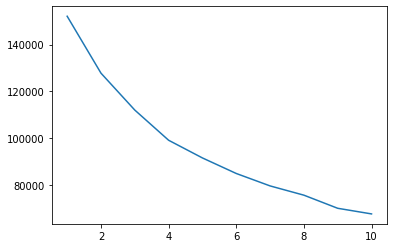

In [5]:

"""K MEANS CLUSTERING """
#Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are
from sklearn.cluster import KMeans
wss= []
for i in range(1, 11):
    kmeans= KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)
plt.plot(range(1,11), wss) # seelecting 4

In [6]:
wss_mean=np.array(wss).mean()
print(wss)
print(wss_mean)
print([abs(wss_mean-x) for x in wss])
k=np.argmin([abs(wss_mean-x) for x in wss])+1

[152150.00000000003, 127784.87449145077, 111986.3661629119, 99073.93826774822, 91502.1394097151, 84850.98165827329, 79532.40237691787, 75568.75961699065, 69954.86482342934, 67546.56302862815]
95995.08898360653
[56154.9110163935, 31789.785507844237, 15991.277179305369, 3078.8492841416883, 4492.949573891427, 11144.107325333243, 16462.686606688658, 20426.329366615886, 26040.224160177197, 28448.52595497838]


[3 1 0 ... 0 3 3]


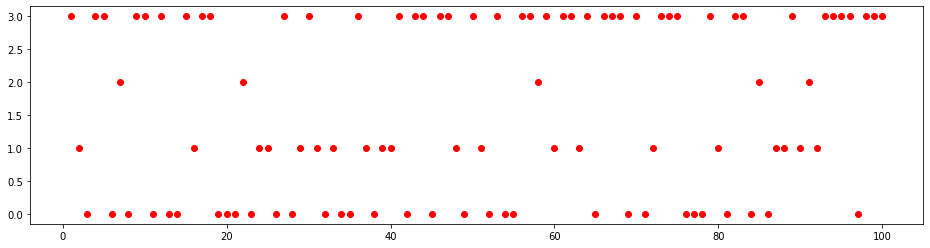

In [17]:
kmeans = KMeans(n_clusters = k, init= 'k-means++', random_state = 0)
kmeans.fit(X)

Y_pred_K= kmeans.predict(X) 
print(Y_pred_K)

#showing the clusters of first 100 persons
plt.figure(figsize=(16,4))
plt.plot(range(1,100+1),Y_pred_K[:100],'ro')